# PMBus on the RFSoC2x2
----

## Aim/s
* Explore the monitoring power rails using PMBus through PYNQ.

## Reference
* [PYNQ docs](https://pynq.readthedocs.io/en/latest/index.html)

## Last revised
* 27Jan21
    * Initial revision
----

The board has some support for monitoring power rails on the board using PMBus.
PYNQ exposes these rails through the `get_rails` function that returns a dictionary
of all of the rails available to be monitored.

In [1]:
import pynq

rails = pynq.get_rails()
rails

{'0V85': Rail {name=0V85, voltage=Sensor {name=0V85_voltage, value=0.85V}, current=Sensor {name=0V85_current, value=3.332A}, power=Sensor {name=0V85_power, value=2.875W}},
 '1V1_DC': Rail {name=1V1_DC, voltage=Sensor {name=1V1_DC_voltage, value=1.096V}, current=Sensor {name=1V1_DC_current, value=1.23A}, power=Sensor {name=1V1_DC_power, value=1.312W}},
 '1V2_PL': Rail {name=1V2_PL, voltage=Sensor {name=1V2_PL_voltage, value=1.201V}, current=Sensor {name=1V2_PL_current, value=0.515A}, power=Sensor {name=1V2_PL_power, value=0.625W}},
 '1V2_PS': Rail {name=1V2_PS, voltage=Sensor {name=1V2_PS_voltage, value=1.198V}, current=Sensor {name=1V2_PS_current, value=0.327A}, power=Sensor {name=1V2_PS_power, value=0.437W}},
 '1V8': Rail {name=1V8, voltage=Sensor {name=1V8_voltage, value=1.831V}, current=Sensor {name=1V8_current, value=0.987A}, power=Sensor {name=1V8_power, value=1.812W}},
 '2V5_DC': Rail {name=2V5_DC, voltage=Sensor {name=2V5_DC_voltage, value=2.518V}, current=Sensor {name=2V5_DC_cu

As can be seen, the keys of the dictionary are the names of the voltage rails
while the values are `Rail` objects which contain three sensors for the voltage, 
current and power.

To see how power changes under CPU load we can use the `DataRecorder` class.
For this example we are going to look at the `0V85` rail listed above
as we load one of the CPU cores in Python.

In [2]:
recorder = pynq.DataRecorder(rails["0V85"].power)

We can now use the recorder to monitor the applied sensor. 
For this example we'll sample the power every half second while sleeping
and performing a dummy loop.

In [3]:
import time

with recorder.record(0.5):
    time.sleep(5)
    for _ in range(10000000):
        pass
    time.sleep(5)

The `DataRecorder` exposes the sensor data as a pandas dataframe.

In [4]:
recorder.frame

,Mark,0V85_power
2020-09-29 00:20:44.439818,0.0,2.937
2020-09-29 00:20:44.962610,0.0,2.687
2020-09-29 00:20:45.473584,0.0,2.812
2020-09-29 00:20:45.984554,0.0,2.687
2020-09-29 00:20:46.495418,0.0,2.687
2020-09-29 00:20:47.006116,0.0,2.687
2020-09-29 00:20:47.516807,0.0,2.687
2020-09-29 00:20:48.027734,0.0,2.687
2020-09-29 00:20:48.538678,0.0,2.687
2020-09-29 00:20:49.049414,0.0,2.687


or by plotting the results using matplotlib

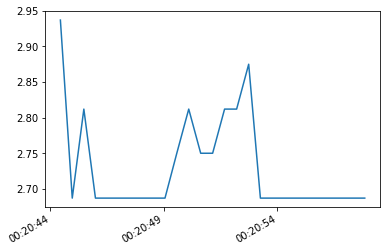

In [5]:
%matplotlib inline
recorder.frame["0V85_power"].plot()

We can get more information by using the `mark` function which will increment
the invocation number without having to stop and start the recorder.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95451b38>,
      dtype=object)

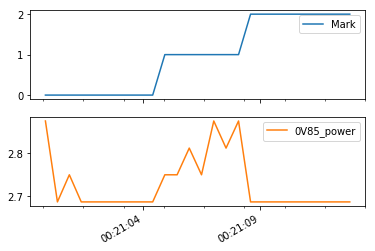

In [6]:
recorder.reset()
with recorder.record(0.5):
    time.sleep(5)
    recorder.mark()
    for _ in range(10000000):
        pass
    recorder.mark()
    time.sleep(5)

recorder.frame.plot(subplots=True)

This clearly shows the power spike when the for loop starts running.

Copyright (C) 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----

----